# 分类算法 Demo

## 逻辑回归demo

In [21]:
from Boster import *
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

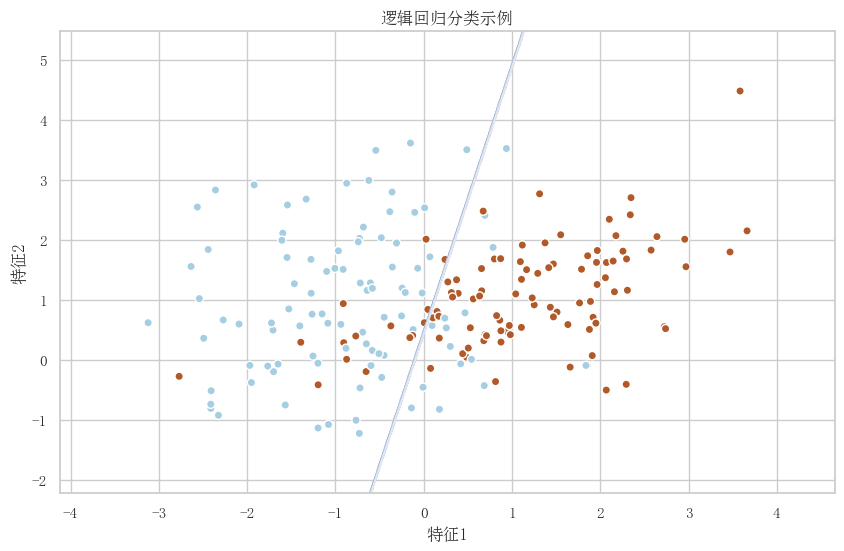

In [22]:
# 生成线性可分的数据集
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=42)

# 创建逻辑回归模型
model = LogisticRegression()
model.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contour(xx, yy, Z, alpha=0.8, colors=['w', 'b'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Paired', edgecolors='w')
plt.rcParams['font.sans-serif'] = 'SimSun'  # 指定宋体绘制
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('逻辑回归分类示例')
plt.savefig('src/log.png')
plt.show()

In [23]:
# 性能指标
y_pred = model.predict(X)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.84
Precision: 0.8333333333333334
Recall: 0.85
F1-score: 0.8415841584158417


## 朴素贝叶斯demo

In [24]:
from sklearn.naive_bayes import GaussianNB

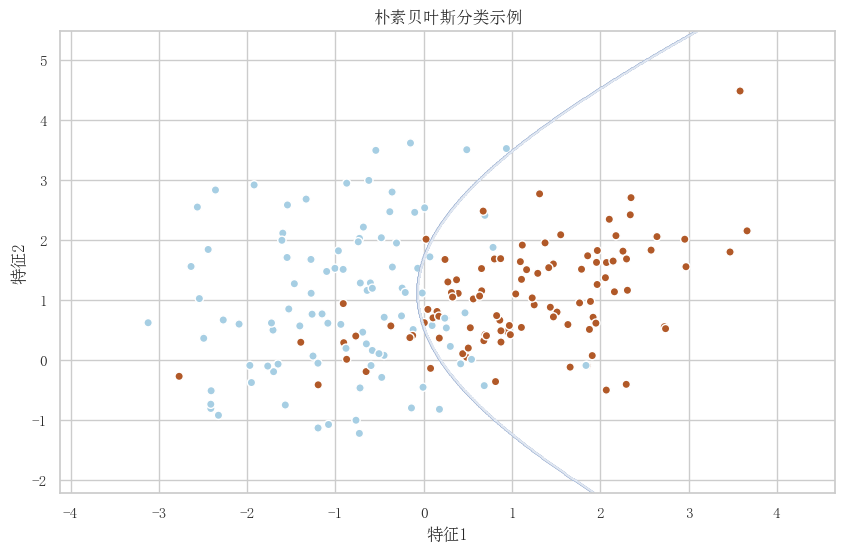

In [25]:
# 创建朴素贝叶斯模型并拟合数据
model = GaussianNB()
model.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contour(xx, yy, Z, alpha=0.8, colors=['w', 'b'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Paired', edgecolors='w')
plt.rcParams['font.sans-serif'] = 'SimSun'  # 指定宋体绘制
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('朴素贝叶斯分类示例')
plt.savefig('src/beyes.png')
plt.show()

In [26]:
y_pred = model.predict(X)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.86
Precision: 0.8529411764705882
Recall: 0.87
F1-score: 0.8613861386138614


## XGBoost demo

In [27]:
import xgboost as xgb
import seaborn as sns

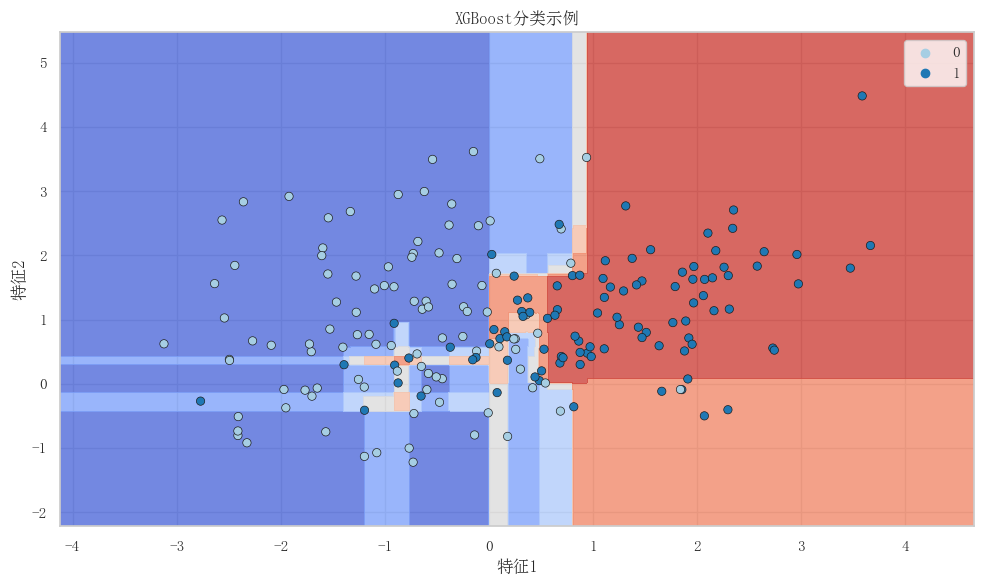

In [28]:
# 将数据集转换为DMatrix格式
dtrain = xgb.DMatrix(X, label=y)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'seed': 42
}
model = xgb.train(params, dtrain)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(xgb.DMatrix(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Paired', edgecolor='k')
plt.rcParams['font.sans-serif'] = 'SimSun'  # 指定宋体绘制
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('XGBoost分类示例')
plt.savefig('src/XGBoost.png')
plt.tight_layout()
plt.show()

In [29]:
y_pred = model.predict(dtrain)
y_pred = (y_pred > 0.5).astype(int)  # 将概率转换为类别标签

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.935
Precision: 0.9484536082474226
Recall: 0.92
F1-score: 0.9340101522842639
